# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **10. Morphological Operations**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646

## Table of Contents
1. [Ejercicios](#Ejercicios)
   1. [Ejercicio A](#EjercicioA)
   1. [Ejercicio B](#EjercicioB)
   1. [Ejercicio C](#EjercicioC)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import morphology, color

## Ejercicios <a class="anchor" id="Ejercicios" ></a>

### Ejercicio A <a class="anchor" id="EjercicioA" ></a>

Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

El objetivo de la operación de erosión en procesamiento de imágenes, es disminuir las fronteras entre los objetos del primer plano, en una imagen de tipo binario. Mientras que en la escala de grises, la erosión se utiliza mediante un elemento estructurante que define la vecindad alrededor de cada pixel. 

Un ejemplo de su aplicación puede ser para la detección y mejora de toma de huellas dactilares. Al encontrare un escaneo de imagen de una huella que no esté totalmente definida. En algunos casos, es posible mejorar su definición al convertir a imagen binaria, y erosionar la imagen.

In [2]:
def enhance_fingerprint(image, erosion_iterations=1):

    # Generamos la imagen binaria definiendo el threshold
    _, binary_image = cv2.threshold(image, 210, 250, cv2.THRESH_BINARY_INV)
    
    # Definimos el elemento para aplicar la operación
    kernel = np.ones((3,3),np.uint8)
    # Aplicamos la operación de erosión
    eroded_image = cv2.erode(binary_image,kernel,erosion_iterations)
    
    return binary_image, eroded_image

In [3]:
image = cv2.imread('data/fingertip2.jpg', cv2.IMREAD_GRAYSCALE) # cargamos imagen
binary_image, eroded_image = enhance_fingerprint(image) # aplicamos función

Desplegamos imágenes:

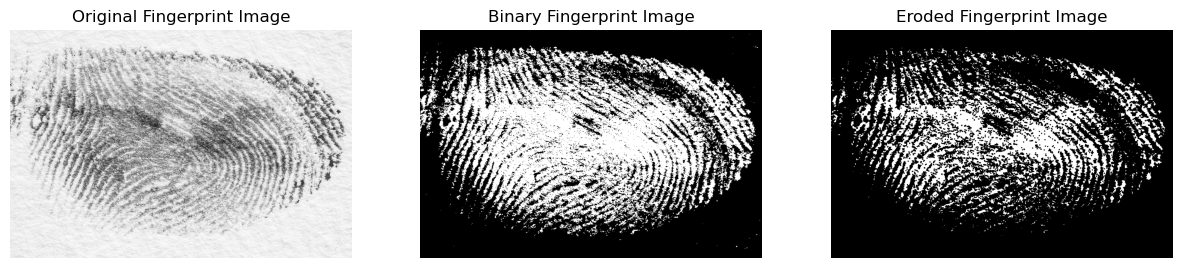

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Fingerprint Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Fingerprint Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Fingerprint Image')
plt.axis('off')

plt.show()

### Ejercicio B <a class="anchor" id="EjercicioB" ></a>

Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

La dilatación es una operación morfológica que se utiliza para resaltar y mejorar la visibilidad características específicas. Una posible aplicación es el mejoramiento de documentos escaneados. La dilatación puede servir para conectar y rellenar caracteres que se encuentren fragmentados. Para engrosar líneas delgadas que no sean tan visibles. Así como para eliminar pequeños espacios entre caracteres o líneas de texto. 

In [5]:
def enhance_text(document, dilation_iterations=1):
    
    # Alicamos un median blur como preprocesamiento 
    blurred_image = cv2.medianBlur(document, 5)

    # Generamos la imagen binaria definiendo el threshold
    _, binary_image = cv2.threshold(blurred_image, 50, 100, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Definimos el elemento para aplicar la operación de dilatación
    structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Aplicamos la operación de dilatación
    dilated_image = cv2.dilate(binary_image, structuring_element, iterations=dilation_iterations)

    return binary_image, dilated_image

In [6]:
image = cv2.imread('data/document.jpg', cv2.IMREAD_GRAYSCALE) # cargamos imagen
binary_image, dilated_image = enhance_text(image) # aplicamos función

Desplegamos imágenes:

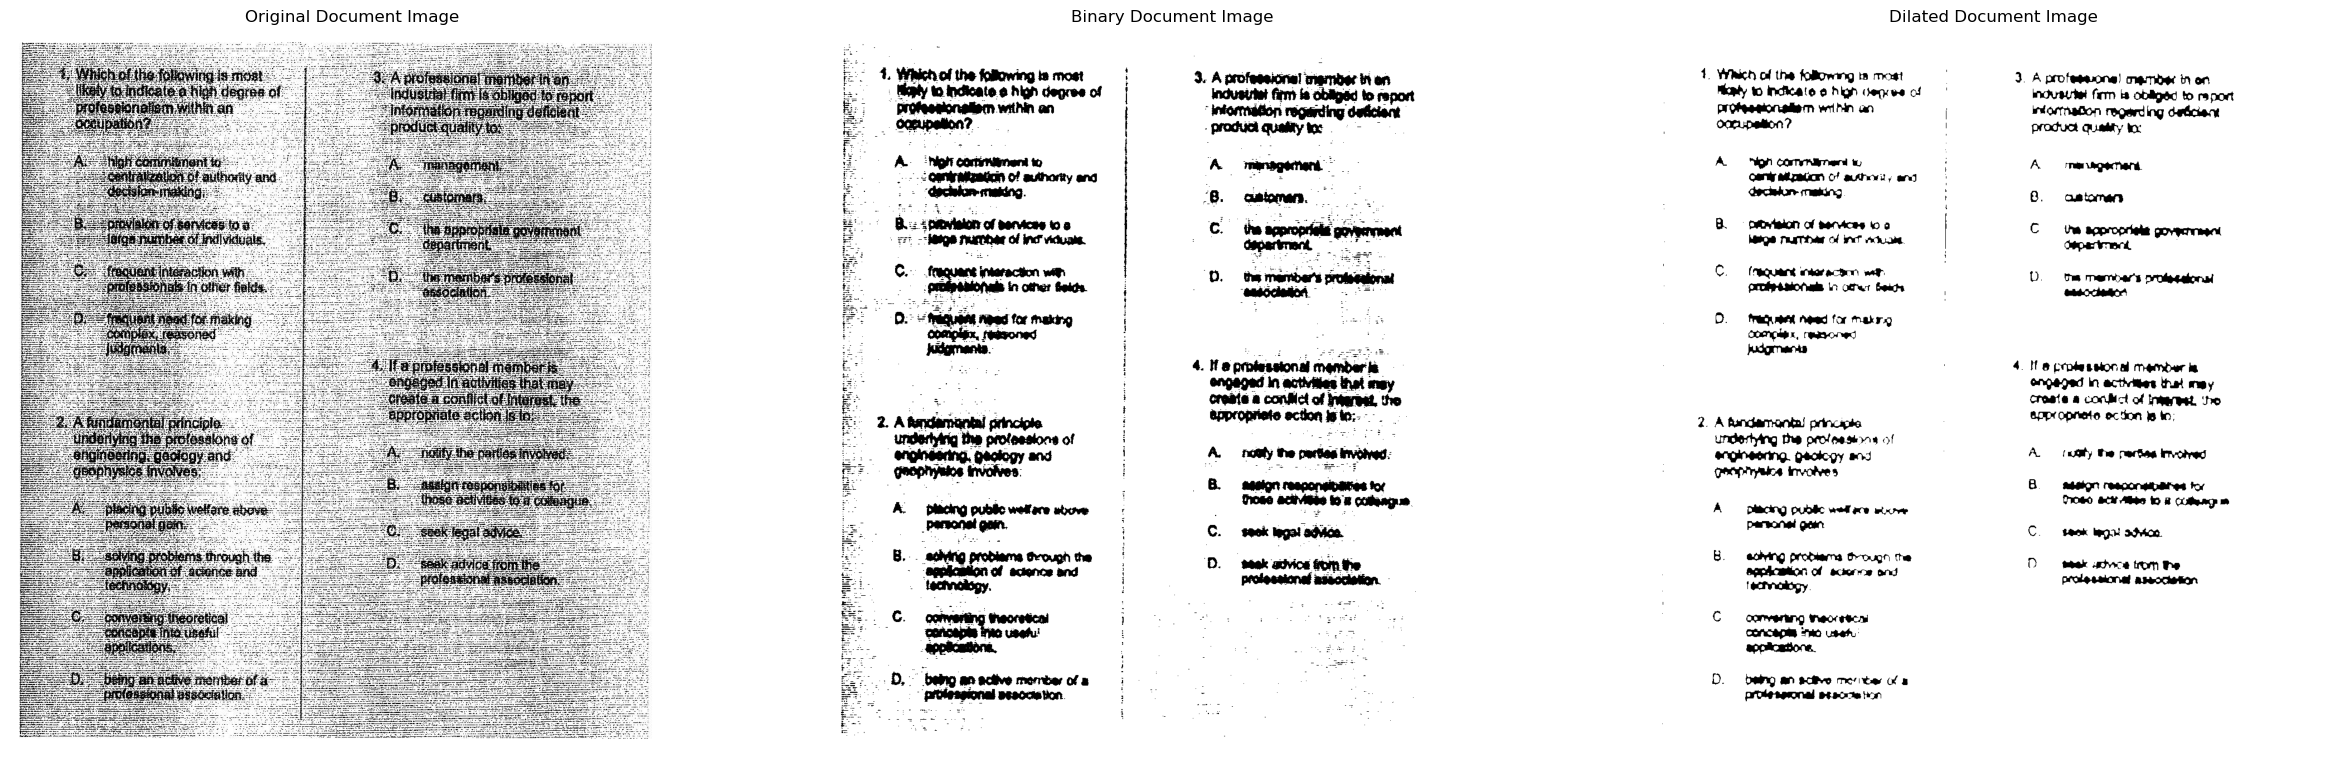

In [7]:
plt.figure(figsize=(30, 20))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Document Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Document Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Document Image')
plt.axis('off')

plt.show()

### Ejercicio C <a class="anchor" id="EjercicioC" ></a>

Investigar una aplicación de opening y closing e implementalo en Google Colab

### Opening

La operación de closing es una operación morfológica que combina primero la dilatación, y luego la erosión de imágenes. Un caso de aplicación es para mejorar visibilidad de la estructura ósea en imágenes de rayos X. Ayuda a eliminar ruido, a separar estructuras conectadas por tejido, y mejora la delineación de bordes. 

In [8]:
def enhance_bone_structure(xray_image, kernel_size=3):
    
    # Generamos la imagen binaria definiendo el threshold
    _, binary_image = cv2.threshold(xray_image, 100, 180, cv2.THRESH_BINARY)

    # Definimos el elemento para aplicar la operación
    structuring_element = np.ones((kernel_size, kernel_size), np.uint8)
    # Aplicamos la operación de opening
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

    return binary_image, opened_image

In [9]:
image = cv2.imread('data/x_ray.jpg', cv2.IMREAD_GRAYSCALE) # cargamos imagen
binary_image, opened_image = enhance_bone_structure(image) # aplicamos función

Desplegamos imágenes:

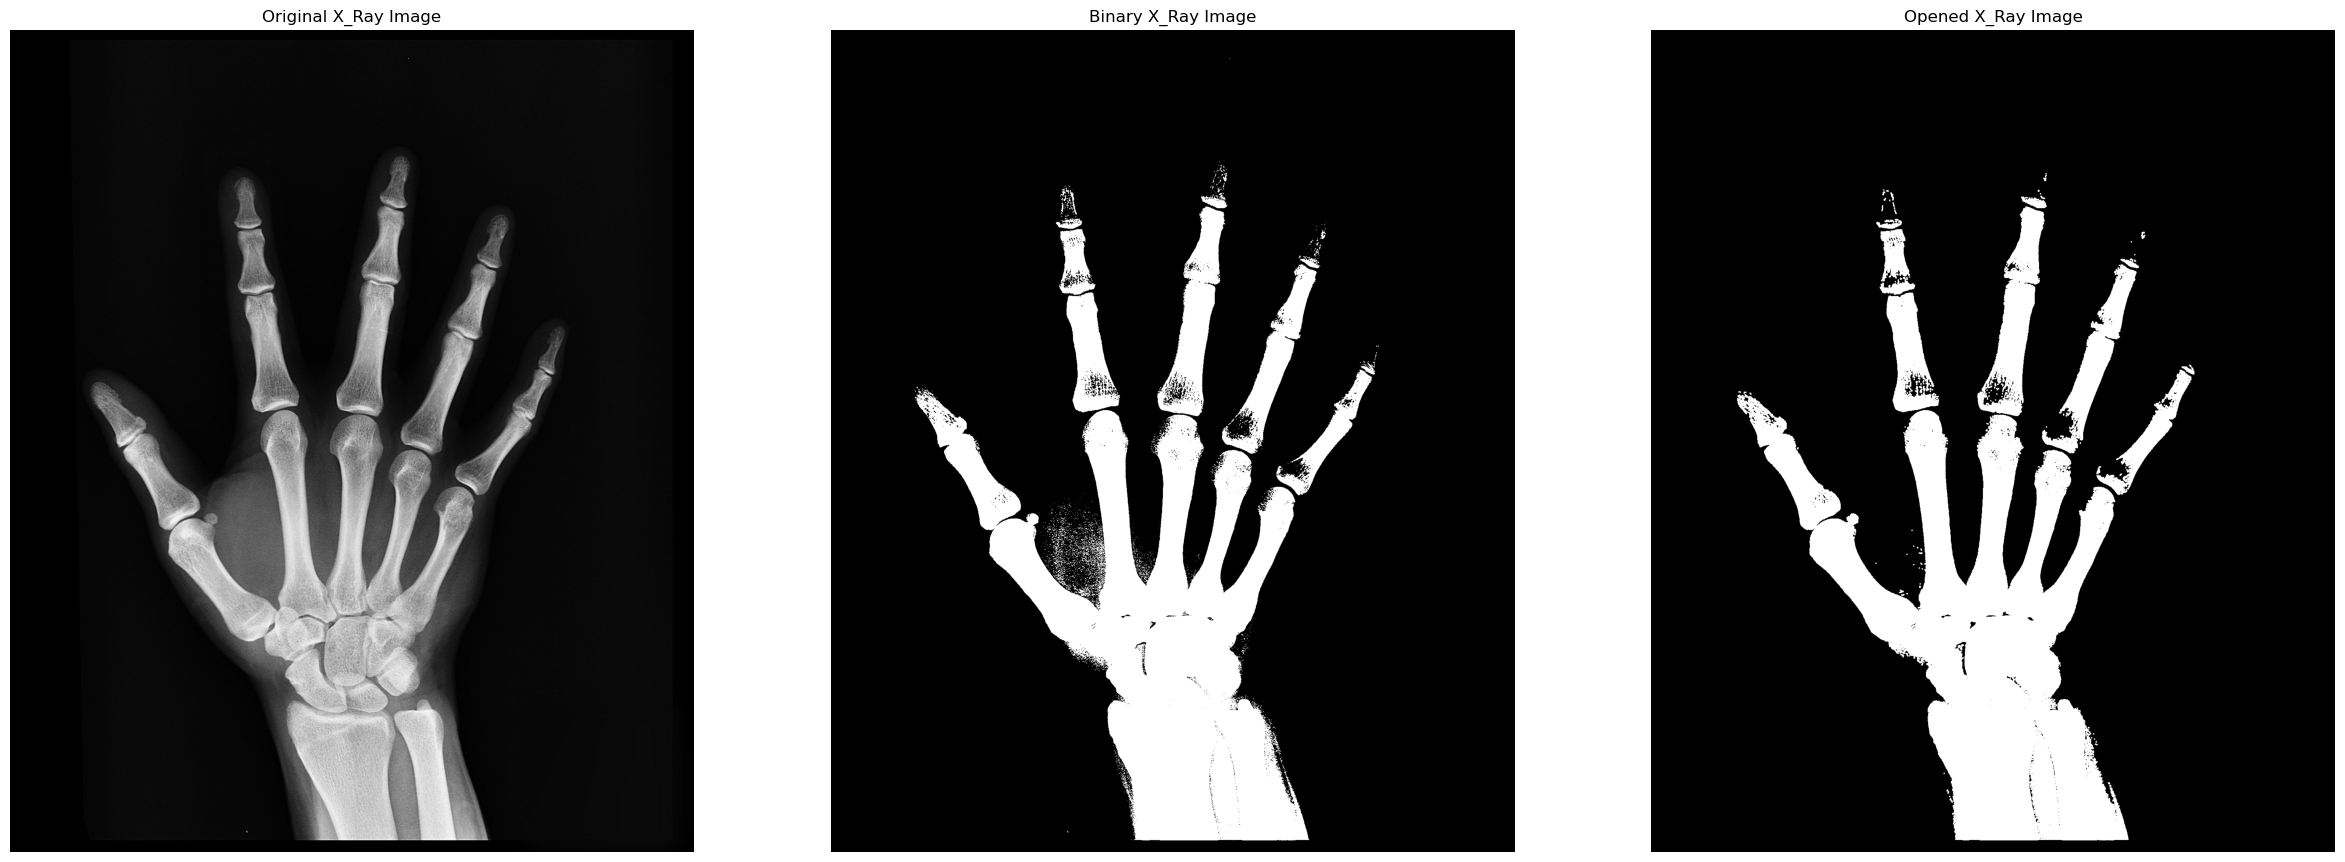

In [10]:
plt.figure(figsize=(30, 20))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original X_Ray Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary X_Ray Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened X_Ray Image')
plt.axis('off')

plt.show()

### Closing

La operación de closing, similar a únicamente la de dilatación en el primer ejercicio, puede utilizarse para mejorar la calidad y legibilidad de imágenes de documentos. Complementa a únicamente utilizar la dilatación. Sirve para rellenar brechas y fragmentaciones en los caracteres y líneas. Así como para la unión de líneas delgadas o desvanecidas. Finalmente, ayuda a eliminar ruido en la imagen.  

In [11]:
def detect_circuit_board_defects(image, kernel_size=3):
    
    # Alicamos un median blur como preprocesamiento 
    blurred_image = cv2.medianBlur(image, 5)
    
    # Generamos la imagen binaria definiendo el threshold
    _, binary_image = cv2.threshold(blurred_image, 10, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Definimos el elemento para aplicar la operación
    structuring_element = np.ones((kernel_size, kernel_size), np.uint8)
    # Aplicamos la operación de closing
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, structuring_element)

    return binary_image, closed_image

In [12]:
image = cv2.imread('data/document.jpg', cv2.IMREAD_GRAYSCALE) # cargamos imagen
binary_image, closed_image = detect_circuit_board_defects(image) # aplicamos función

Desplegamos imágenes:

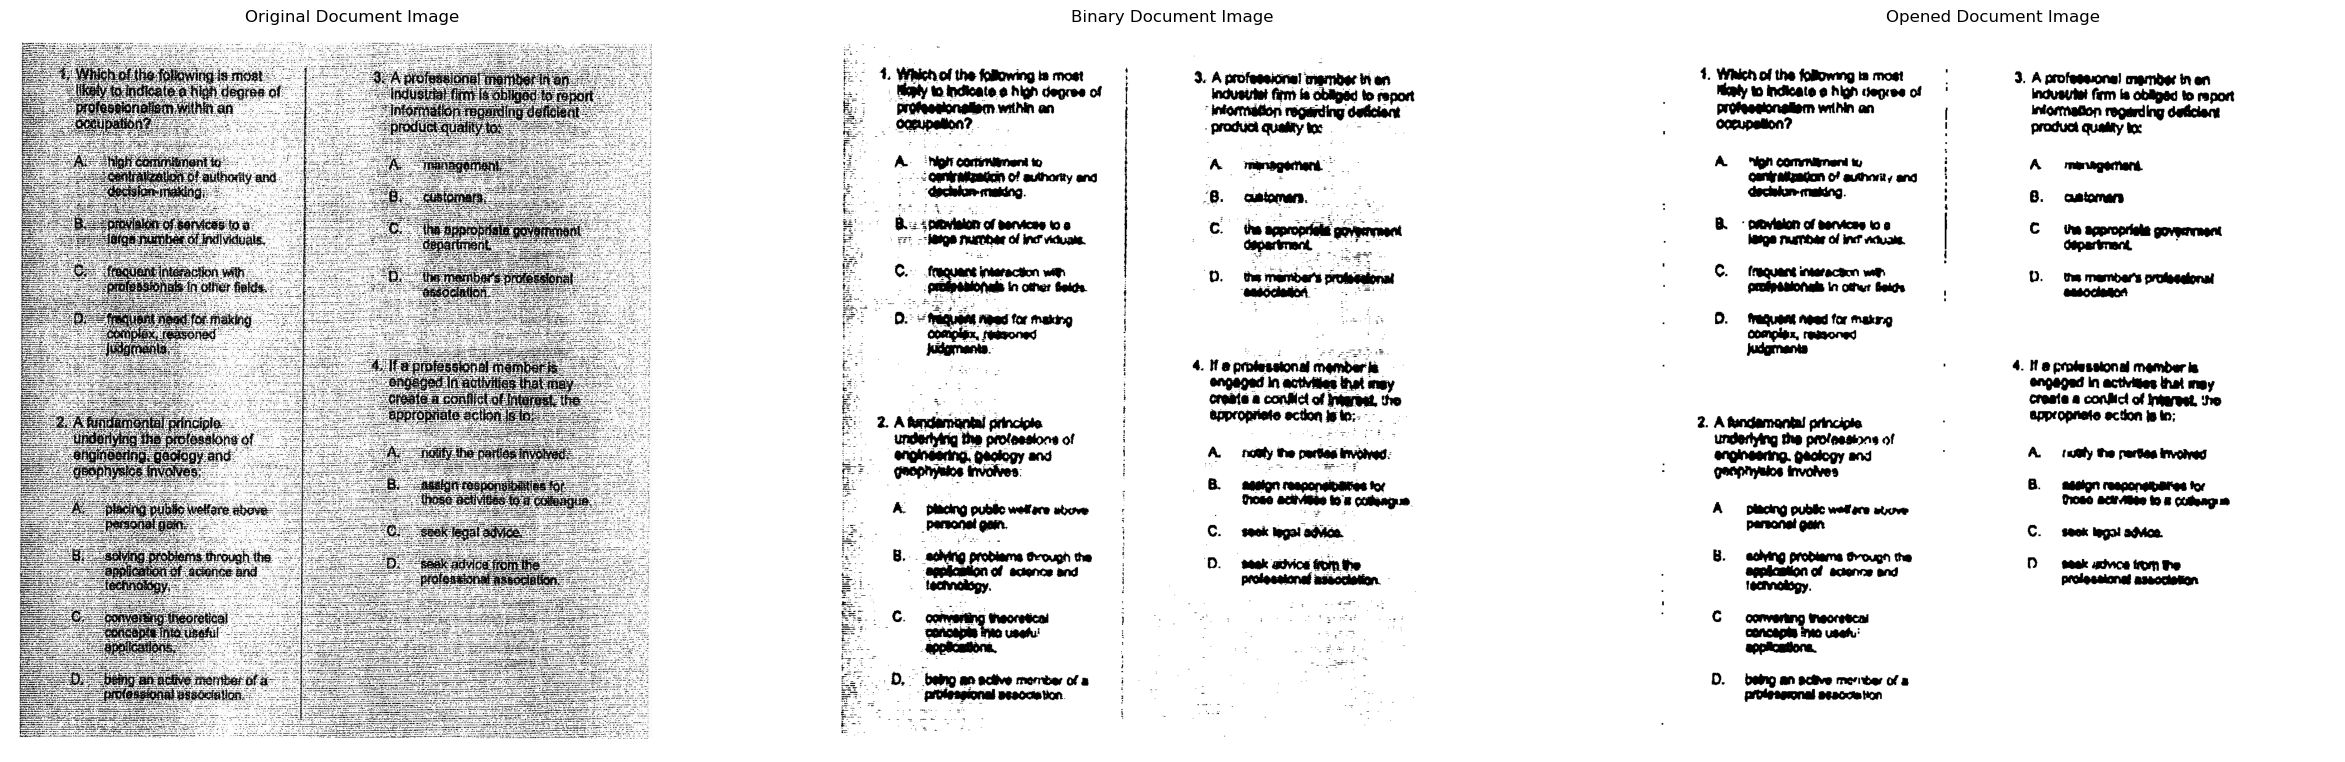

In [13]:
plt.figure(figsize=(30, 20))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Document Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Document Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(closed_image, cmap='gray')
plt.title('Opened Document Image')
plt.axis('off')

plt.show()

# **3. Referencias** <a class="anchor" id="Referencias" ></a>

* Bradski, G. (2000). The OpenCV Library. Dr. Dobb's Journal of Software Tools.
* Chhikara, P. (2022). Understanding Morphological Image Processing and Its Operations. Retrieved from Medium: https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756
* Gonzalez, R., & Woods, R. (2018). Digital Image Processing. Pearson.
* OpenCV. (n.d.). Morphological Transformations. Retrieved from OpenCV: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
* Rosebrock, A. (2021). OpenCV Morphological Operations. Retrieved from Pyimagesearch: https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/
* Singh, R. (2020). Morphological Transformations of Images using OpenCV | Image Processing Part-2. Retrieved from Medium: https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

